In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
import ydata_profiling
from ydata_profiling import ProfileReport

In [ ]:
# Initial Data Exploration

In [14]:
df = pd.read_csv(r'C:\Users\fring\OneDrive\Documents\Exploratory Data Analysis With Python and Pandas Project\supermarket_sales - Sheet1.csv')

In [22]:
df.head(10)

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   
2019-03-25  699-14-3026      C  Naypyitaw        Normal    Male   
2019-02-25  355-53-5943      A     Yangon        Member  Female   
2019-02-24  315-22-5665      C  Naypyitaw        Normal  Female   
2019-01-10  665-32-9167      A     Yangon        Member  Female   
2019-02-20  692-92-5582      B   Mandalay        Member  Female   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69         7  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28         5   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33         7  16.2155  340.5255   
2019-01-27       Health and beauty       58.22         8  23.2880  489.0480   
2019-02-08       Sports and travel       86.31         7  30.2085  634.3785   
2019-03-25  Electronic accessories       85.39         7  29.8865  627.6165   
2019-02-25  Electronic accessories       68.84         6  20.6520  433.6920   
2019-02-24      Home and lifestyle       73.56        10  36.7800  772.3800   
2019-01-10       Health and beauty       36.26         2   3.6260   76.1460   
2019-02-20      Food and beverages       54.84         3   8.2260  172.7460   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   
2019-03-25  18:30      Ewallet  597.73                 4.761905       29.8865   
2019-02-25  14:36      Ewallet  413.04                 4.761905       20.6520   
2019-02-24  11:38      Ewallet  735.60                 4.761905       36.7800   
2019-01-10  17:15  Credit card   72.52                 4.761905        3.6260   
2019-02-20  13:27  Credit card  164.52                 4.761905        8.2260   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3  
2019-03-25     4.1  
2019-02-25     5.8  
2019-02-24     8.0  
2019-01-10     7.2  
2019-02-20     5.9

In [21]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [20]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.set_index('Date',inplace=True)

In [54]:
## Univariate Analysis
# What does the distribution of customer ratings look like? Is it skewed?

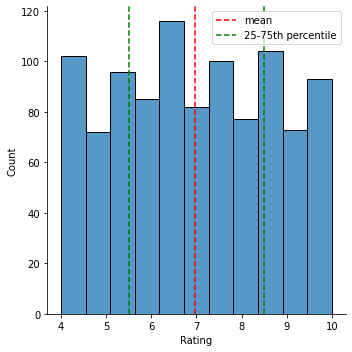

In [28]:
sns.displot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red', ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--')
plt.legend()

In [55]:
# Shows a relatively uniform distibution among customer ratings
# No appearance of it skewed in either left or right direction

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

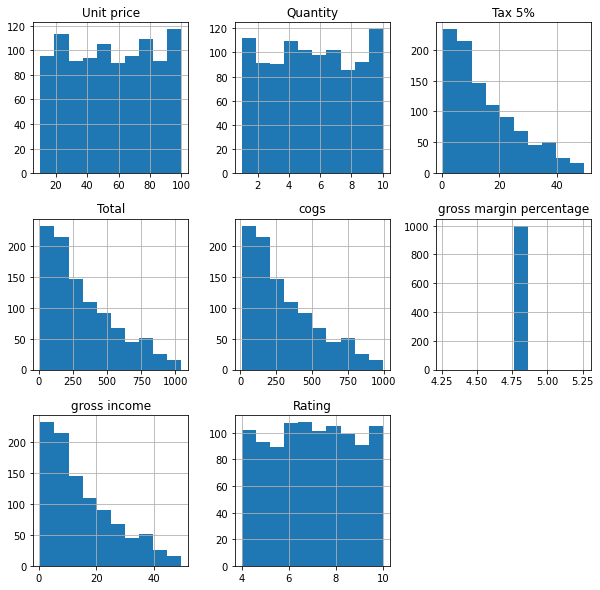

In [27]:
df.hist(figsize=(10,10))

In [ ]:
# Do aggregate sales numbers differ by much between branches?

C:\Users\fring\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

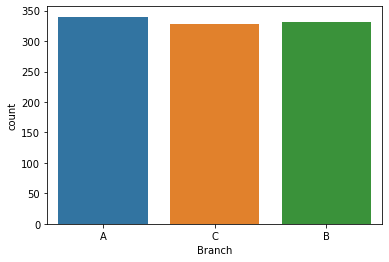

In [29]:
sns.countplot(df['Branch'])

In [30]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [ ]:
# Sales numbers do not differ much between branches

C:\Users\fring\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

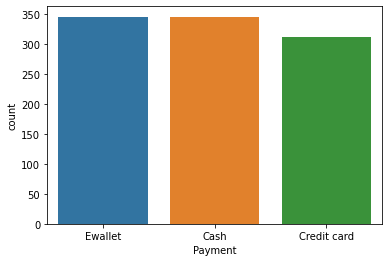

In [31]:
sns.countplot(df['Payment'])

In [ ]:
# Is there a relationship between gross income and customer ratings?

C:\Users\fring\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

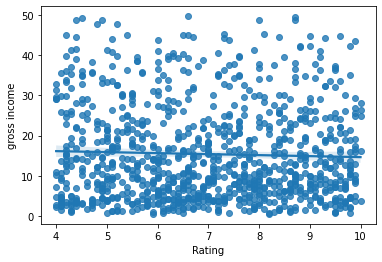

In [32]:
sns.regplot(df['Rating'],df['gross income'])

In [ ]:
# Does not appear to be a relationship between gross income and customer rating

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

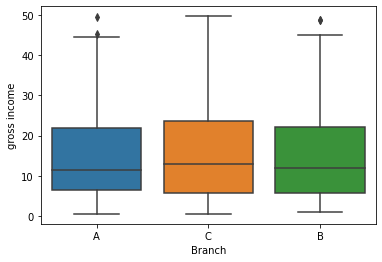

In [33]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

In [ ]:
# Is there a noticeable time trend in gross income?

In [34]:
df.groupby(df.index).mean()

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.750000  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  6.090909  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

In [35]:
df.groupby(df.index).mean().index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

<AxesSubplot:xlabel='Date', ylabel='gross income'>

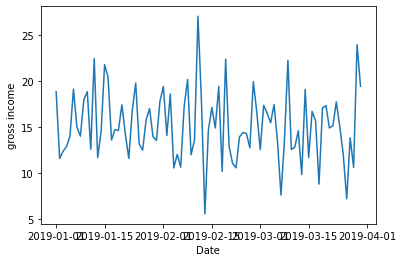

In [36]:
sns.lineplot(x=df.groupby(df.index).mean().index,
            y=df.groupby(df.index).mean()['gross income'])

In [ ]:
# No noticeable time trend. Varies around the same mean. Could possibly be because we're analyzing only 3 months of gross income.

In [ ]:
# Dealing with Duplicate Rows and Missing Data

In [38]:
df.duplicated().sum()

0

In [39]:
df[df.duplicated()==True]

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []

In [40]:
df.drop_duplicates(inplace=True)

In [41]:
df.isna().sum()/len(df)

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

<AxesSubplot:ylabel='Date'>

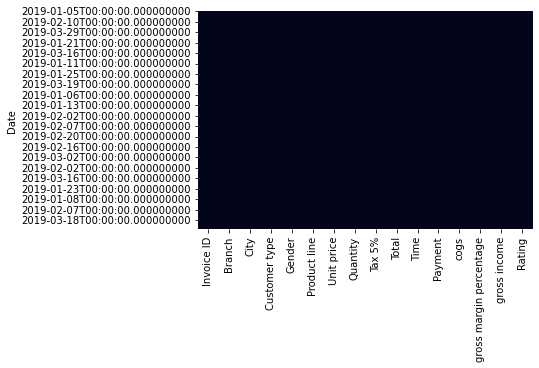

In [42]:
sns.heatmap(df.isnull(),cbar=False)

In [43]:
df.fillna(df.mean(),inplace=True)

C:\Users\fring\AppData\Local\Temp/ipykernel_32972/2085774198.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [44]:
df.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Member
Gender                                  Female
Product line               Fashion accessories
Unit price                               83.77
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

In [46]:
df.fillna(df.mode().iloc[0],inplace=True)

In [ ]:
# Filling missing numerical data with mean and mode values within category

In [49]:
dataset = pd.read_csv(r'C:\Users\fring\OneDrive\Documents\Exploratory Data Analysis With Python and Pandas Project\supermarket_sales - Sheet1.csv')
prof = ProfileReport(dataset)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Correlation Analysis

In [50]:
round(np.corrcoef(df['gross income'],df['Rating'])[1][0],2)

-0.04

In [51]:
np.round(df.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.71   0.71  0.71   
Tax 5%                         0.63      0.71    1.00   1.00  1.00   
Total                          0.63      0.71    1.00   1.00  1.00   
cogs                           0.63      0.71    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.71    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.71   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<AxesSubplot:>

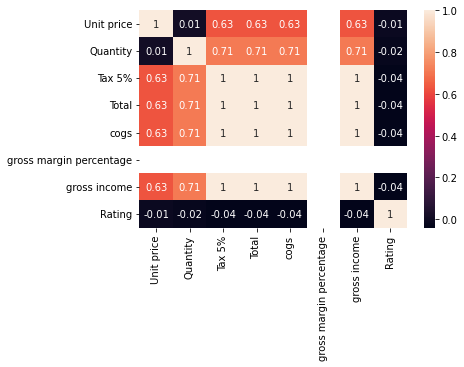

In [53]:
sns.heatmap(np.round(df.corr(),2),annot=True)